In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ucl-202122-uefa-champions-league/defending.csv
/kaggle/input/ucl-202122-uefa-champions-league/key_stats.csv
/kaggle/input/ucl-202122-uefa-champions-league/attacking.csv
/kaggle/input/ucl-202122-uefa-champions-league/goalkeeping.csv
/kaggle/input/ucl-202122-uefa-champions-league/disciplinary.csv
/kaggle/input/ucl-202122-uefa-champions-league/goals.csv
/kaggle/input/ucl-202122-uefa-champions-league/attempts.csv
/kaggle/input/ucl-202122-uefa-champions-league/distributon.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Lets elaborate the Defending stats of Clubs and Players**

And find which Club have most tackles and best defenders


In [3]:
df_defending = pd.read_csv("/kaggle/input/ucl-202122-uefa-champions-league/defending.csv")
df_defending

,serial,player_name,club,position,balls_recoverd,tackles,t_won,t_lost,clearance_attempted,match_played
0,1,Casemiro,Real Madrid,Midfielder,76,31,13,18,19,11
1,1,Éder Militão,Real Madrid,Defender,76,19,6,13,32,12
2,1,Reinildo,Atlético,Defender,76,13,6,7,20,10
3,4,Fabinho,Liverpool,Midfielder,74,23,9,14,8,13
4,5,Albiol,Villarreal,Defender,73,9,6,3,62,12
...,...,...,...,...,...,...,...,...,...,...
622,578,Maier,Young Boys,Midfielder,1,0,0,0,0,1
623,578,Zhegrova,LOSC,Midfielder,1,0,0,0,0,1
624,578,Zesiger,Young Boys,Defender,1,0,0,0,0,1
625,578,Zakaria,Juventus,Midfielder,1,0,0,0,0,1


In [4]:
df_defending.head(10)

,serial,player_name,club,position,balls_recoverd,tackles,t_won,t_lost,clearance_attempted,match_played
0,1,Casemiro,Real Madrid,Midfielder,76,31,13,18,19,11
1,1,Éder Militão,Real Madrid,Defender,76,19,6,13,32,12
2,1,Reinildo,Atlético,Defender,76,13,6,7,20,10
3,4,Fabinho,Liverpool,Midfielder,74,23,9,14,8,13
4,5,Albiol,Villarreal,Defender,73,9,6,3,62,12
5,6,Thiago Silva,Chelsea,Defender,65,9,4,5,17,9
6,7,Otamendi,Benfica,Defender,63,28,17,11,48,9
7,8,Capoue,Villarreal,Midfielder,62,11,1,10,29,12
8,8,Van Dijk,Liverpool,Defender,62,3,2,1,29,9
9,10,João Cancelo,Man. City,Defender,56,9,6,3,13,9


In [5]:
print(df_defending.describe())


           serial  balls_recoverd     tackles       t_won      t_lost  \
count  627.000000      627.000000  627.000000  627.000000  627.000000   
mean   304.298246       16.406699    4.732057    2.068581    2.663477   
std    174.780489       14.760673    5.012920    2.607452    2.915200   
min      1.000000        1.000000    0.000000    0.000000    0.000000   
25%    154.500000        5.000000    1.000000    0.000000    1.000000   
50%    300.000000       12.000000    3.000000    1.000000    2.000000   
75%    448.000000       24.500000    7.000000    3.000000    4.000000   
max    578.000000       76.000000   35.000000   18.000000   19.000000   

       clearance_attempted  match_played  
count           627.000000    627.000000  
mean              6.314195      5.472089  
std               8.458044      2.548652  
min               0.000000      1.000000  
25%               1.000000      4.000000  
50%               3.000000      5.000000  
75%               8.000000      7.000000 

In [6]:
print(df_defending.describe(include="all"))

            serial player_name       club    position  balls_recoverd  \
count   627.000000         627        627         627      627.000000   
unique         NaN         617         32           3             NaN   
top            NaN      Danilo  Liverpool  Midfielder             NaN   
freq           NaN           2         24         262             NaN   
mean    304.298246         NaN        NaN         NaN       16.406699   
std     174.780489         NaN        NaN         NaN       14.760673   
min       1.000000         NaN        NaN         NaN        1.000000   
25%     154.500000         NaN        NaN         NaN        5.000000   
50%     300.000000         NaN        NaN         NaN       12.000000   
75%     448.000000         NaN        NaN         NaN       24.500000   
max     578.000000         NaN        NaN         NaN       76.000000   

           tackles       t_won      t_lost  clearance_attempted  match_played  
count   627.000000  627.000000  627.000000 

Text(0, 0.5, 'Total count')

<Figure size 1000x800 with 0 Axes>

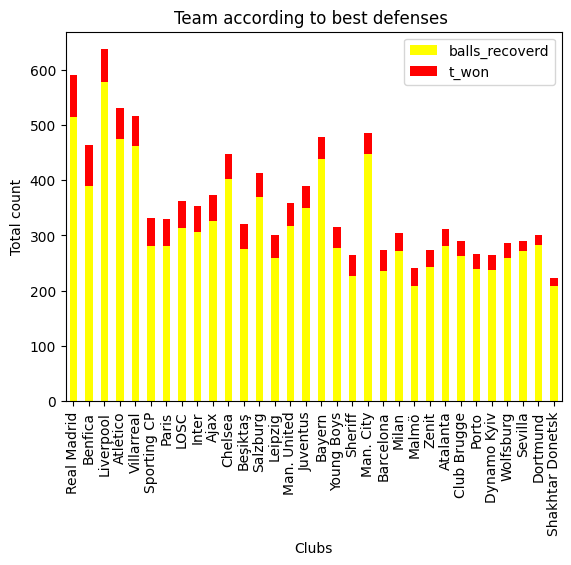

In [7]:
club_defending_status = df_defending.groupby('club')[[ 'balls_recoverd','t_won']].sum().sort_values(by='t_won', ascending=False)
plt.figure(figsize = (10,8))
club_defending_status.plot(kind='bar',stacked = True , color = ['yellow','red'])
plt.title('Team according to best defenses ')
plt.xlabel('Clubs')
plt.ylabel('Total count')

Here, we can say that Real Madrid have the most tackle won and clearance , so it is the best defending teams among all

**Let's Check for the best defender in the game with most tackle won and ball_recovered in the match they have played**


Text(0, 0.5, 'Defenses to Match Played Ratio')

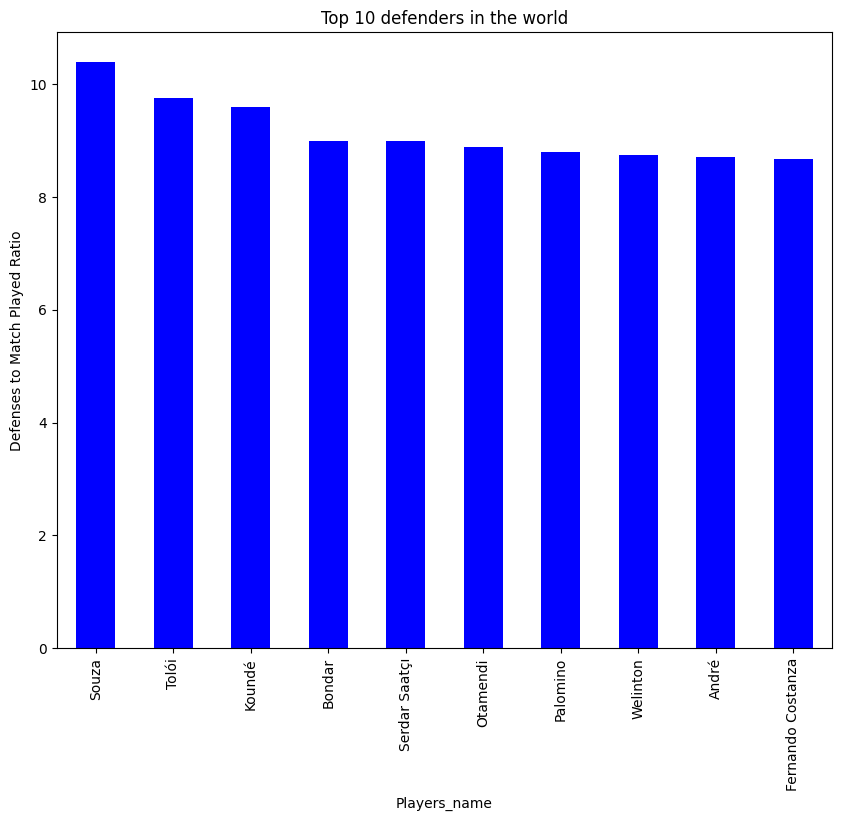

In [15]:
df_defending['defenses_ratio'] = (df_defending['t_won'] + df_defending['balls_recoverd']) / df_defending['match_played']
top_defenders = df_defending.sort_values(by='defenses_ratio',ascending=False).head(10)

plt.figure(figsize=(10,8))
top_defenders.set_index('player_name')['defenses_ratio'].plot(kind = 'bar',color = 'blue' )
plt.title('Top 10 defenders in the world')
plt.xlabel('Players_name')
plt.ylabel('Defenses to Match Played Ratio')

In [17]:
df_attacking = pd.read_csv("/kaggle/input/ucl-202122-uefa-champions-league/attacking.csv")
df_attacking

,serial,player_name,club,position,assists,corner_taken,offsides,dribbles,match_played
0,1,Bruno Fernandes,Man. United,Midfielder,7,10,2,7,7
1,2,Vinícius Júnior,Real Madrid,Forward,6,3,4,83,13
2,2,Sané,Bayern,Midfielder,6,3,3,32,10
3,4,Antony,Ajax,Forward,5,3,4,28,7
4,5,Alexander-Arnold,Liverpool,Defender,4,36,0,9,9
...,...,...,...,...,...,...,...,...,...
171,64,Tolisso,Bayern,Midfielder,1,0,0,0,4
172,64,Schuurs,Ajax,Defender,1,0,0,0,3
173,64,Kryvtsov,Shakhtar Donetsk,Defender,1,0,0,0,3
174,64,Stanišić,Bayern,Defender,1,0,0,0,2


**Let us find the best 5 strikers with the most dribbles and assists upon match played in the world**

Text(0, 0.5, '(Dribble+assist) to Match ratio')

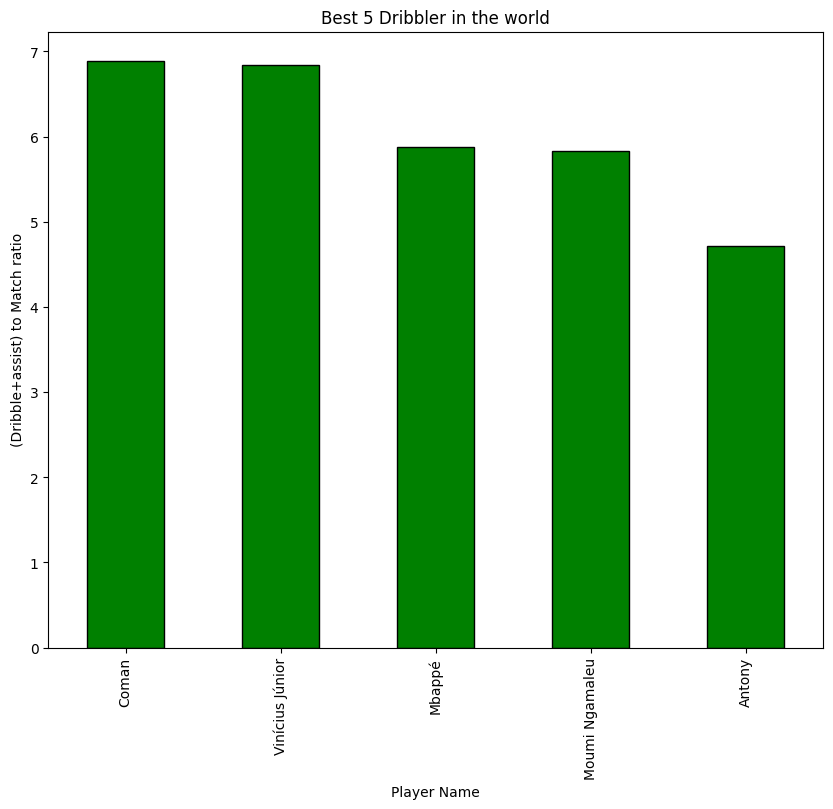

In [18]:
df_attacking['dribbles_ratio']=(df_attacking['dribbles']+df_attacking['assists'])/df_attacking['match_played']
top_player = df_attacking.sort_values(by='dribbles_ratio',ascending=False).head(5)
plt.figure(figsize=(10,8))
top_player.set_index('player_name')['dribbles_ratio'].plot(kind='bar',color='green',edgecolor='black')
plt.title('Best 5 Dribbler in the world')
plt.xlabel('Player Name')
plt.ylabel('(Dribble+assist) to Match ratio')

In [21]:
df_goal_scorer = pd.read_csv("/kaggle/input/ucl-202122-uefa-champions-league/goals.csv")
df_goal_scorer

,serial,player_name,club,position,goals,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties,match_played
0,1,Benzema,Real Madrid,Forward,15,11,1,3,0,13,2,3,12
1,2,Lewandowski,Bayern,Forward,13,8,3,1,1,13,0,3,10
2,3,Haller,Ajax,Forward,11,3,4,3,1,11,0,1,8
3,4,Salah,Liverpool,Forward,8,0,8,0,0,7,1,1,13
4,5,Nkunku,Leipzig,Midfielder,7,3,1,3,0,7,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,73,Yansané,Sheriff,Forward,1,0,0,1,0,1,0,0,3
179,73,Yakhshiboev,Sheriff,Forward,1,0,0,1,0,1,0,0,3
180,73,Messias Junior,Milan,Forward,1,0,0,1,0,1,0,0,2
181,73,Morato,Benfica,Defender,1,0,0,1,0,1,0,0,2


**Find the 10 highest goal scorer with the match played in the world**

Text(0, 0.5, 'Goal to Match ratio')

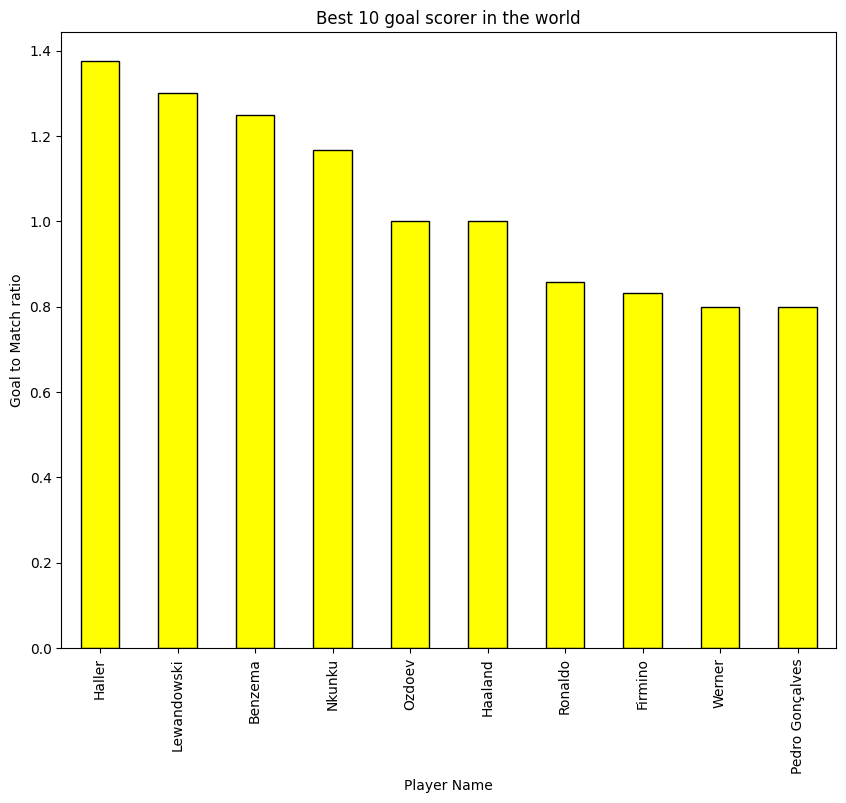

In [22]:
df_goal_scorer['goal_ratio']=(df_goal_scorer['goals'])/df_goal_scorer['match_played']
high_player = df_goal_scorer.sort_values(by='goal_ratio',ascending=False).head(10)
plt.figure(figsize=(10,8))
high_player.set_index('player_name')['goal_ratio'].plot(kind='bar',color='yellow',edgecolor='black')
plt.title('Best 10 goal scorer in the world')
plt.xlabel('Player Name')
plt.ylabel('Goal to Match ratio')

**Best goal keeper according to goal saved**

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

df_goalkeeping = pd.read_csv("/kaggle/input/ucl-202122-uefa-champions-league/goalkeeping.csv")

df_goalkeeping.head(5)

,serial,player_name,club,position,saved,conceded,saved_penalties,cleansheets,punches made,match_played
0,1,Courtois,Real Madrid,Goalkeeper,61,14,1,5,4,13
1,2,Rulli,Villarreal,Goalkeeper,41,16,0,3,12,12
2,3,Vlachodimos,Benfica,Goalkeeper,38,17,1,5,5,10
3,4,Athanasiadis,Sheriff,Goalkeeper,29,8,0,1,2,5
4,5,Mignolet,Club Brugge,Goalkeeper,28,20,0,0,1,6


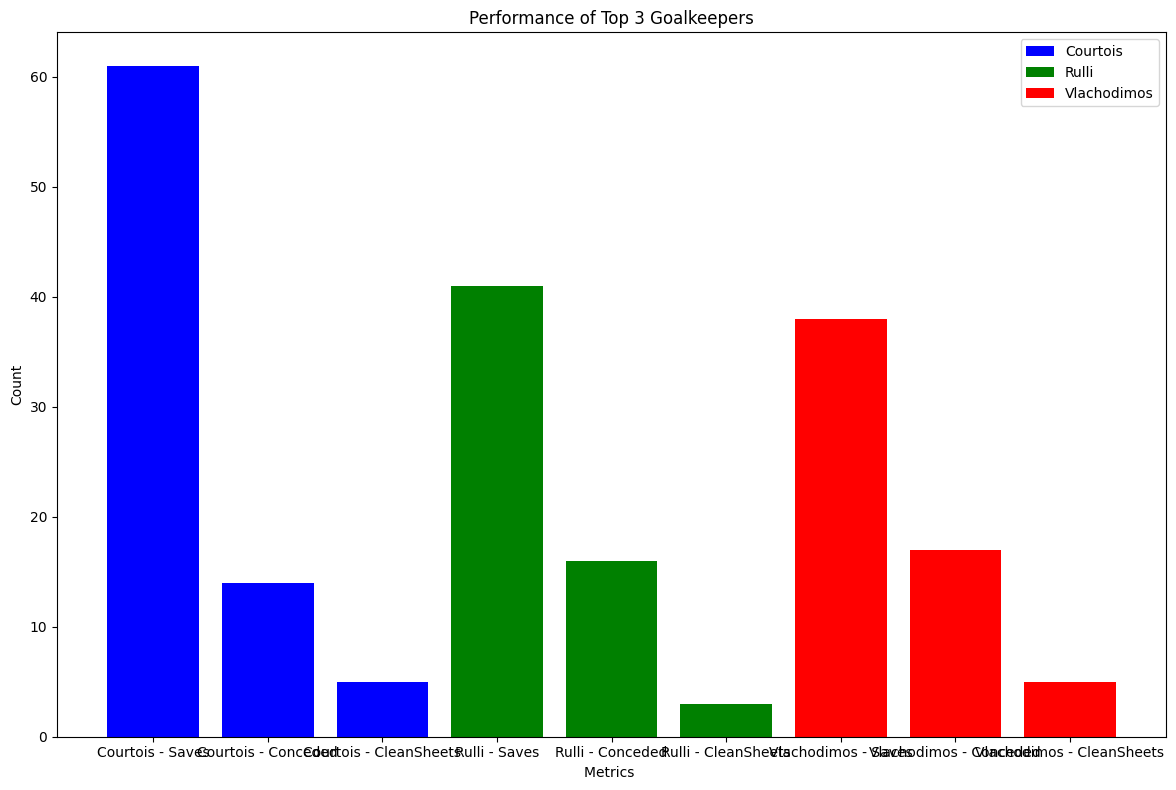

In [24]:
df_goalkeeping['performance_metric'] = (df_goalkeeping['saved'] - df_goalkeeping['conceded']) + (2 * df_goalkeeping['cleansheets'])

top_goalkeepers = df_goalkeeping.nlargest(3, 'performance_metric')

plt.figure(figsize=(12, 8))

colors = ['blue', 'green', 'red'] 
for idx, goalkeeper in top_goalkeepers.iterrows():
    plt.bar(
        [f"{goalkeeper['player_name']} - Saves",
         f"{goalkeeper['player_name']} - Conceded",
         f"{goalkeeper['player_name']} - CleanSheets"],
        [goalkeeper['saved'], goalkeeper['conceded'], goalkeeper['cleansheets']],
        color=colors[idx]
    )

plt.title('Performance of Top 3 Goalkeepers')
plt.xlabel('Metrics ')
plt.ylabel('Count')
plt.legend(top_goalkeepers['player_name'])
plt.tight_layout()

plt.show()
